# Short overview of numerical relativity datasets

In this notebook we will download data from a numerical relativity simuluation. We will then

* inspect the data file to look at the extracted waveform data on different coordinate spheres 
* inspect the far-field extrapolated singal
* show the $\ell=m=2$ mode for GW150914-like signal (the first GW detection)

From the GW150914 paper, we see the mass ratio is about M1/M2  ~ 1.2 and the black holes are approximately non-spinning: https://arxiv.org/pdf/1602.03840v2.pdf

Looking through the SXS [numerical relativity catalog](https://data.black-holes.org/waveforms/catalog.html), we see that simulation ID 66 is reasonably close to these values. The data is here:


https://zenodo.org/record/3312783#.ZA0AANLMI5k

Lets download two files for the extraction radii data and the far-field extrapolated data. We should download the Lev5 data as thats the most accurate. Note that in the file's name, CoM means "center-of-mass corrected" because the binary's center-of-mass might drift during the simulation (which is undesirable). 

In [1]:
# packages we'll need
import urllib.request
import h5py
import matplotlib.pyplot as plt

In [3]:
# Download the far-field datasets
urllib.request.urlretrieve("https://zenodo.org/record/3312783/files/SXS:BBH:0066/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5?download=1", "rhOverM_Asymptotic_GeometricUnits_CoM.h5")

('rhOverM_Asymptotic_GeometricUnits_CoM.h5',
 <http.client.HTTPMessage at 0x7fe6d0cac4f0>)

In [7]:
# Download the near-field (extraction sphere) datasets
urllib.request.urlretrieve("https://zenodo.org/record/3312783/files/SXS:BBH:0066/Lev5/rh_FiniteRadii_CodeUnits.h5?download=1", "rh_FiniteRadii_CodeUnits.h5")

('rh_FiniteRadii_CodeUnits.h5', <http.client.HTTPMessage at 0x7fe6a95ae190>)

In [2]:
# Now check that both files are there (check file sizes are correct)
!ls -lhs

total 1.6G
 48K -rw-r--r-- 1 balzani57 balzani57  45K Aug 16  2020 ExploratoryAnalysisTable.docx
 32K -rw-rw-r-- 1 balzani57 balzani57  32K Aug  1  2021 Flatspace_Kernel_Teleportation.png
4.0K drwxrwxr-x 3 balzani57 balzani57 4.0K Jul  8  2021 interpolation_sandbox
1.1M -rw-r--r-- 1 balzani57 balzani57 1.1M Aug  4  2021 KernelScalingsWithR1.ipynb
4.0K drwxr-xr-x 2 balzani57 balzani57 4.0K Aug  4  2021 __pycache__
612K -rw-r--r-- 1 balzani57 balzani57 612K Mar 11 17:16 RecoveringRWZFunctions.ipynb
1.5G -rw-rw-r-- 1 balzani57 balzani57 1.5G Mar 11 17:34 rh_FiniteRadii_CodeUnits.h5
136M -rw-rw-r-- 1 balzani57 balzani57 136M Mar 11 17:32 rhOverM_Asymptotic_GeometricUnits_CoM.h5
 16K -rw-rw-r-- 1 balzani57 balzani57  16K Aug  1  2021 SXS_BBH_0073_R0363_L2_M2_Error_Estimator.png
1.2M -rw-r--r-- 1 balzani57 balzani57 1.2M Aug  1  2021 SXS_BBH_0073_R0363_L2_M2_Teleport_Signal.ipynb
588K -rw-r--r-- 1 balzani57 balzani57 587K Mar 11 17:16 SXS_Data_Sandbox.ipynb
4.0K lrwxrwxrwx 1 balzani57 balzan

## Lesson 1: extracted waveform data on different coordinate spheres

In [9]:
# Open the file for reading
fp_rh_FiniteRadii = h5py.File("rh_FiniteRadii_CodeUnits.h5",'r')

In [11]:
# hdf5 files behave like python dictionaries. 

# Lets look at the keys which are datasets.
# Each dataset is the waveform data extracted on a different coordinate sphere
fp_rh_FiniteRadii.keys()

<KeysViewHDF5 ['R0100.dir', 'R0102.dir', 'R0105.dir', 'R0108.dir', 'R0111.dir', 'R0114.dir', 'R0117.dir', 'R0121.dir', 'R0125.dir', 'R0129.dir', 'R0133.dir', 'R0137.dir', 'R0142.dir', 'R0148.dir', 'R0153.dir', 'R0160.dir', 'R0166.dir', 'R0173.dir', 'R0181.dir', 'R0190.dir', 'R0200.dir', 'R0210.dir', 'R0222.dir', 'R0235.dir', 'R0250.dir', 'R0266.dir', 'R0285.dir', 'R0307.dir', 'R0333.dir', 'R0363.dir', 'VersionHist.ver']>

In [13]:
# lets look at the closest one set to R = 100
# we see the data extracted on this sphere includes information about
#  1) the flow of time -- AverageLapse
#  2) the Areal radius, which is not going to be the same as the coordinate radius
#  3) spin-weighted harmonic modes
fp_rh_FiniteRadii_100 = fp_rh_FiniteRadii['R0100.dir']
fp_rh_FiniteRadii_100.keys()

<KeysViewHDF5 ['ArealRadius.dat', 'AverageLapse.dat', 'CoordRadius.dat', 'InitialAdmEnergy.dat', 'Y_l2_m-1.dat', 'Y_l2_m-2.dat', 'Y_l2_m0.dat', 'Y_l2_m1.dat', 'Y_l2_m2.dat', 'Y_l3_m-1.dat', 'Y_l3_m-2.dat', 'Y_l3_m-3.dat', 'Y_l3_m0.dat', 'Y_l3_m1.dat', 'Y_l3_m2.dat', 'Y_l3_m3.dat', 'Y_l4_m-1.dat', 'Y_l4_m-2.dat', 'Y_l4_m-3.dat', 'Y_l4_m-4.dat', 'Y_l4_m0.dat', 'Y_l4_m1.dat', 'Y_l4_m2.dat', 'Y_l4_m3.dat', 'Y_l4_m4.dat', 'Y_l5_m-1.dat', 'Y_l5_m-2.dat', 'Y_l5_m-3.dat', 'Y_l5_m-4.dat', 'Y_l5_m-5.dat', 'Y_l5_m0.dat', 'Y_l5_m1.dat', 'Y_l5_m2.dat', 'Y_l5_m3.dat', 'Y_l5_m4.dat', 'Y_l5_m5.dat', 'Y_l6_m-1.dat', 'Y_l6_m-2.dat', 'Y_l6_m-3.dat', 'Y_l6_m-4.dat', 'Y_l6_m-5.dat', 'Y_l6_m-6.dat', 'Y_l6_m0.dat', 'Y_l6_m1.dat', 'Y_l6_m2.dat', 'Y_l6_m3.dat', 'Y_l6_m4.dat', 'Y_l6_m5.dat', 'Y_l6_m6.dat', 'Y_l7_m-1.dat', 'Y_l7_m-2.dat', 'Y_l7_m-3.dat', 'Y_l7_m-4.dat', 'Y_l7_m-5.dat', 'Y_l7_m-6.dat', 'Y_l7_m-7.dat', 'Y_l7_m0.dat', 'Y_l7_m1.dat', 'Y_l7_m2.dat', 'Y_l7_m3.dat', 'Y_l7_m4.dat', 'Y_l7_m5.dat', 'Y_l7_

Lets plot the harmonic modes $h_{22}(t)$. First we need to see the dataset's shape. we should find 3 columns for:

1. time -- column 1
2. real part of $h_{22}(t)$  -- column 2
3. imaginary part of $h_{22}(t)$  -- column 3



In [15]:
fp_rh_FiniteRadii_100['Y_l2_m2.dat']

<HDF5 dataset "Y_l2_m2.dat": shape (27404, 3), type "<f8">

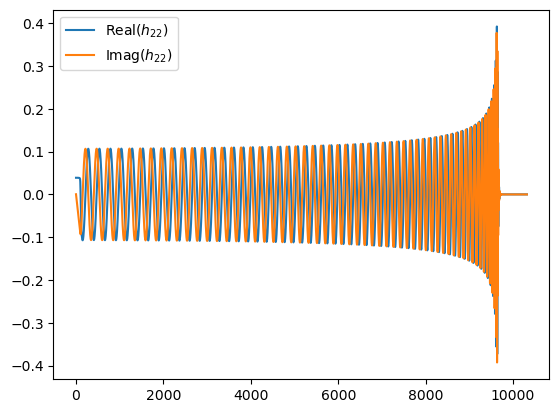

In [19]:
plt.plot(fp_rh_FiniteRadii_100['Y_l2_m2.dat'][:,0],fp_rh_FiniteRadii_100['Y_l2_m2.dat'][:,1],label=r'Real($h_{22})$')
plt.plot(fp_rh_FiniteRadii_100['Y_l2_m2.dat'][:,0],fp_rh_FiniteRadii_100['Y_l2_m2.dat'][:,2],label=r'Imag($h_{22})$')
plt.legend()

Lets compare the wave at coordinte radius R=100 with R=363

We should find they are different. We will see there's a time offset and the amplitude changes. The differences should make sense: 

* The wave needs to travel from R=100 to R=363. The wave should arrive about 363-100 = 263 units of time later because it travels at a speed of about 1, and the sphere at 363 is 263 units of space further way from the sphere at 100.
* The wave's amplitde decreases as it moves outward


There could be other differences too, but these are the most noticeble by eye

In [20]:
fp_rh_FiniteRadii_363 = fp_rh_FiniteRadii['R0363.dir']

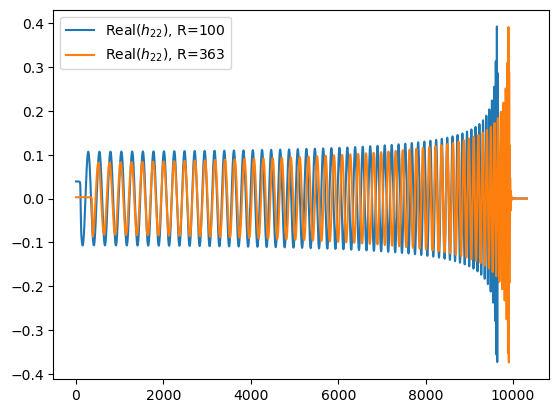

In [22]:
plt.plot(fp_rh_FiniteRadii_100['Y_l2_m2.dat'][:,0],fp_rh_FiniteRadii_100['Y_l2_m2.dat'][:,1],label=r'Real($h_{22})$, R=100')
plt.plot(fp_rh_FiniteRadii_363['Y_l2_m2.dat'][:,0],fp_rh_FiniteRadii_363['Y_l2_m2.dat'][:,1],label=r'Real($h_{22})$, R=363')
plt.legend()

## Lesson 2: far-field extrapolated singal

The waveform most relevant to LIGO is the one in the far-field, formally $r \rightarrow \infty$. The main idea is to use data extracted on different coordinate spheres to deduce what the far-field signal should be. While the procedure is somwhat involved (https://arxiv.org/pdf/0905.3177.pdf), the basic idea is what we discussed in class.

Here we will look at the far-field data for different extrapolation orders N

In [36]:
# Open the file for reading
fp_rhOverM_Asymptotic_GeometricUnits_CoM = h5py.File("rhOverM_Asymptotic_GeometricUnits_CoM.h5",'r')

In [37]:
fp_rhOverM_Asymptotic_GeometricUnits_CoM.keys()

<KeysViewHDF5 ['Extrapolated_N2.dir', 'Extrapolated_N3.dir', 'Extrapolated_N4.dir', 'OutermostExtraction.dir', 'VersionHist.ver']>

In [38]:
fp_rhOverM_Asymptotic_GeometricUnits_CoM_N2 = fp_rhOverM_Asymptotic_GeometricUnits_CoM['Extrapolated_N2.dir']
fp_rhOverM_Asymptotic_GeometricUnits_CoM_N4 = fp_rhOverM_Asymptotic_GeometricUnits_CoM['Extrapolated_N4.dir']

In [39]:
# similar datasets from before
fp_rhOverM_Asymptotic_GeometricUnits_CoM_N4.keys()

<KeysViewHDF5 ['History.txt', 'Y_l2_m-1.dat', 'Y_l2_m-2.dat', 'Y_l2_m0.dat', 'Y_l2_m1.dat', 'Y_l2_m2.dat', 'Y_l3_m-1.dat', 'Y_l3_m-2.dat', 'Y_l3_m-3.dat', 'Y_l3_m0.dat', 'Y_l3_m1.dat', 'Y_l3_m2.dat', 'Y_l3_m3.dat', 'Y_l4_m-1.dat', 'Y_l4_m-2.dat', 'Y_l4_m-3.dat', 'Y_l4_m-4.dat', 'Y_l4_m0.dat', 'Y_l4_m1.dat', 'Y_l4_m2.dat', 'Y_l4_m3.dat', 'Y_l4_m4.dat', 'Y_l5_m-1.dat', 'Y_l5_m-2.dat', 'Y_l5_m-3.dat', 'Y_l5_m-4.dat', 'Y_l5_m-5.dat', 'Y_l5_m0.dat', 'Y_l5_m1.dat', 'Y_l5_m2.dat', 'Y_l5_m3.dat', 'Y_l5_m4.dat', 'Y_l5_m5.dat', 'Y_l6_m-1.dat', 'Y_l6_m-2.dat', 'Y_l6_m-3.dat', 'Y_l6_m-4.dat', 'Y_l6_m-5.dat', 'Y_l6_m-6.dat', 'Y_l6_m0.dat', 'Y_l6_m1.dat', 'Y_l6_m2.dat', 'Y_l6_m3.dat', 'Y_l6_m4.dat', 'Y_l6_m5.dat', 'Y_l6_m6.dat', 'Y_l7_m-1.dat', 'Y_l7_m-2.dat', 'Y_l7_m-3.dat', 'Y_l7_m-4.dat', 'Y_l7_m-5.dat', 'Y_l7_m-6.dat', 'Y_l7_m-7.dat', 'Y_l7_m0.dat', 'Y_l7_m1.dat', 'Y_l7_m2.dat', 'Y_l7_m3.dat', 'Y_l7_m4.dat', 'Y_l7_m5.dat', 'Y_l7_m6.dat', 'Y_l7_m7.dat', 'Y_l8_m-1.dat', 'Y_l8_m-2.dat', 'Y_l8_m-3.d

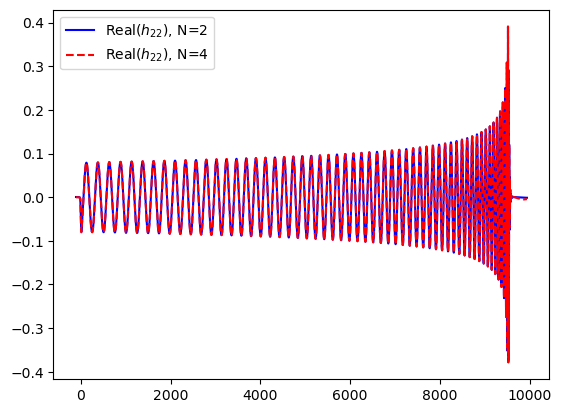

In [40]:
plt.plot(fp_rhOverM_Asymptotic_GeometricUnits_CoM_N2['Y_l2_m2.dat'][:,0],fp_rhOverM_Asymptotic_GeometricUnits_CoM_N2['Y_l2_m2.dat'][:,1],'blue',label=r'Real($h_{22})$, N=2')
plt.plot(fp_rhOverM_Asymptotic_GeometricUnits_CoM_N4['Y_l2_m2.dat'][:,0],fp_rhOverM_Asymptotic_GeometricUnits_CoM_N4['Y_l2_m2.dat'][:,1],'r--',label=r'Real($h_{22})$, N=4')
plt.legend()

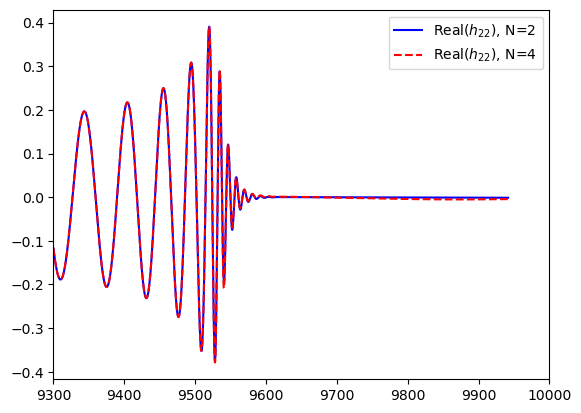

In [41]:
# there are some small differences between N=2 and N=4
plt.plot(fp_rhOverM_Asymptotic_GeometricUnits_CoM_N2['Y_l2_m2.dat'][:,0],fp_rhOverM_Asymptotic_GeometricUnits_CoM_N2['Y_l2_m2.dat'][:,1],'blue',label=r'Real($h_{22})$, N=2')
plt.plot(fp_rhOverM_Asymptotic_GeometricUnits_CoM_N4['Y_l2_m2.dat'][:,0],fp_rhOverM_Asymptotic_GeometricUnits_CoM_N4['Y_l2_m2.dat'][:,1],'r--',label=r'Real($h_{22})$, N=4')
plt.xlim([9300,10000])
plt.legend()

## Lesson 3: compute $h_+$ and $h_{\times}$ for the 22 mode for GW150914 (the first GW detection)

The far-field waveform modes we have been working with are dimensionless. Time is in units of $t/M$ (M = total mass), and the strain itself is actually 

$$\frac{r}{M}h$$

So to get the measured waveforms into mks units (what LIGO actually measures) we need to do some multiplication

In [51]:
total_mass = 70  # in units of solar mass
dist       = 410 # in units of Mpc

# Various constants
MSUN_SI   = 1.9885469549614615e+30  # Solar mass (kg)
PC_SI     = 3.085677581491367e+16   # Parsec (meters)
c         = 2.99792458e+08          # Speed of light (m/s)
G         = 6.6743e-11              # Gravitation constant (m^3/kg/s^2)
Msuninsec = 4.925491025543576e-06   # Solar mass (seconds) = lal.MSUN_SI * lal.G_SI / (lal.C_SI**3.0)


amp0    = ((total_mass * MSUN_SI ) / (1.e6*dist*PC_SI )) * (G / (c*c) )
t_scale = Msuninsec * total_mass

t_mks = t_scale * fp_rhOverM_Asymptotic_GeometricUnits_CoM_N2['Y_l2_m2.dat'][:,0]
h22 = amp0 * (fp_rhOverM_Asymptotic_GeometricUnits_CoM_N2['Y_l2_m2.dat'][:,1] + 1.0j*fp_rhOverM_Asymptotic_GeometricUnits_CoM_N2['Y_l2_m2.dat'][:,1])

Lets look at the 22 harmonic mode. The h+ and hx polarizations will require that we form 

$$h_{22}(t) {}_{-2}Y^{22}(\theta, \phi)$$ 

evaluate at some point on the sphere ($\theta, \phi$), and then take, real or imaginary parts. For simplcity, we will just plot the real part of $h_{22}(t)$. 

Following the GW150914 paper (Fig 6, https://arxiv.org/pdf/1602.03840v2.pdf) we will show the last .2 seconds of the signal. Note that Fig 6 shows the whitened waveform, whereas we just show the waveform here.

Comparing to fig 6, we see its "in the ballpark" but not quite right. For example our waveform's amplitude is about 3x too big. This could be due to any number of simplifications we've made, including not whitenting, not correctly computing the strain at particular values of ($\theta, \phi$), ignoring LIGO's antenna patterns, etc...

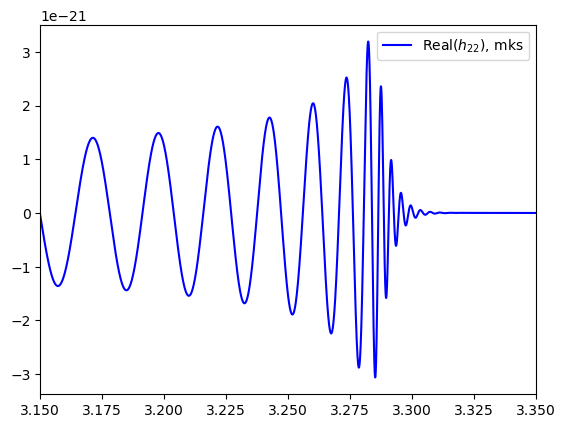

In [53]:
plt.plot(t_mks, h22,'blue',label=r'Real($h_{22})$, mks')
plt.xlim([3.15,3.35])
plt.legend()